# K-means

Se aplicará el mismo modelo de K-Means como se realizó en el notebook anterior, pero ahora con el dataset de vinos de Scikit-Learn

## Librerías

In [16]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Leyendo datos

In [6]:
wine = datasets.load_wine()

## Procesamiento de datos

Creamos nuestros dataframes con los que vamos a trabajar

In [7]:
X_wine = wine.data
Y_wine = wine.target

Debido a que se tienen datos con magnitudes muy diferentes, se recomienda realizar una estandarización de los mismos de la siguiente manera:

In [12]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
scaler.fit(X_wine)
x_scaled = scaler.transform(X_wine)
x = pd.DataFrame(x_scaled, columns=wine.feature_names)
y = pd.DataFrame(Y_wine, columns= ["Target"])
x.head(5)

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051                      1.113449  0.965242  
2         0.269020  0.318304                      0.788587  1.395148  
3         1.186068 -0.427544                      1.184071  2.334574  
4        -0.319276  0.362177                      0.449601 -0.037874

Veamos primero un pairplot antes de aplicar el modelo

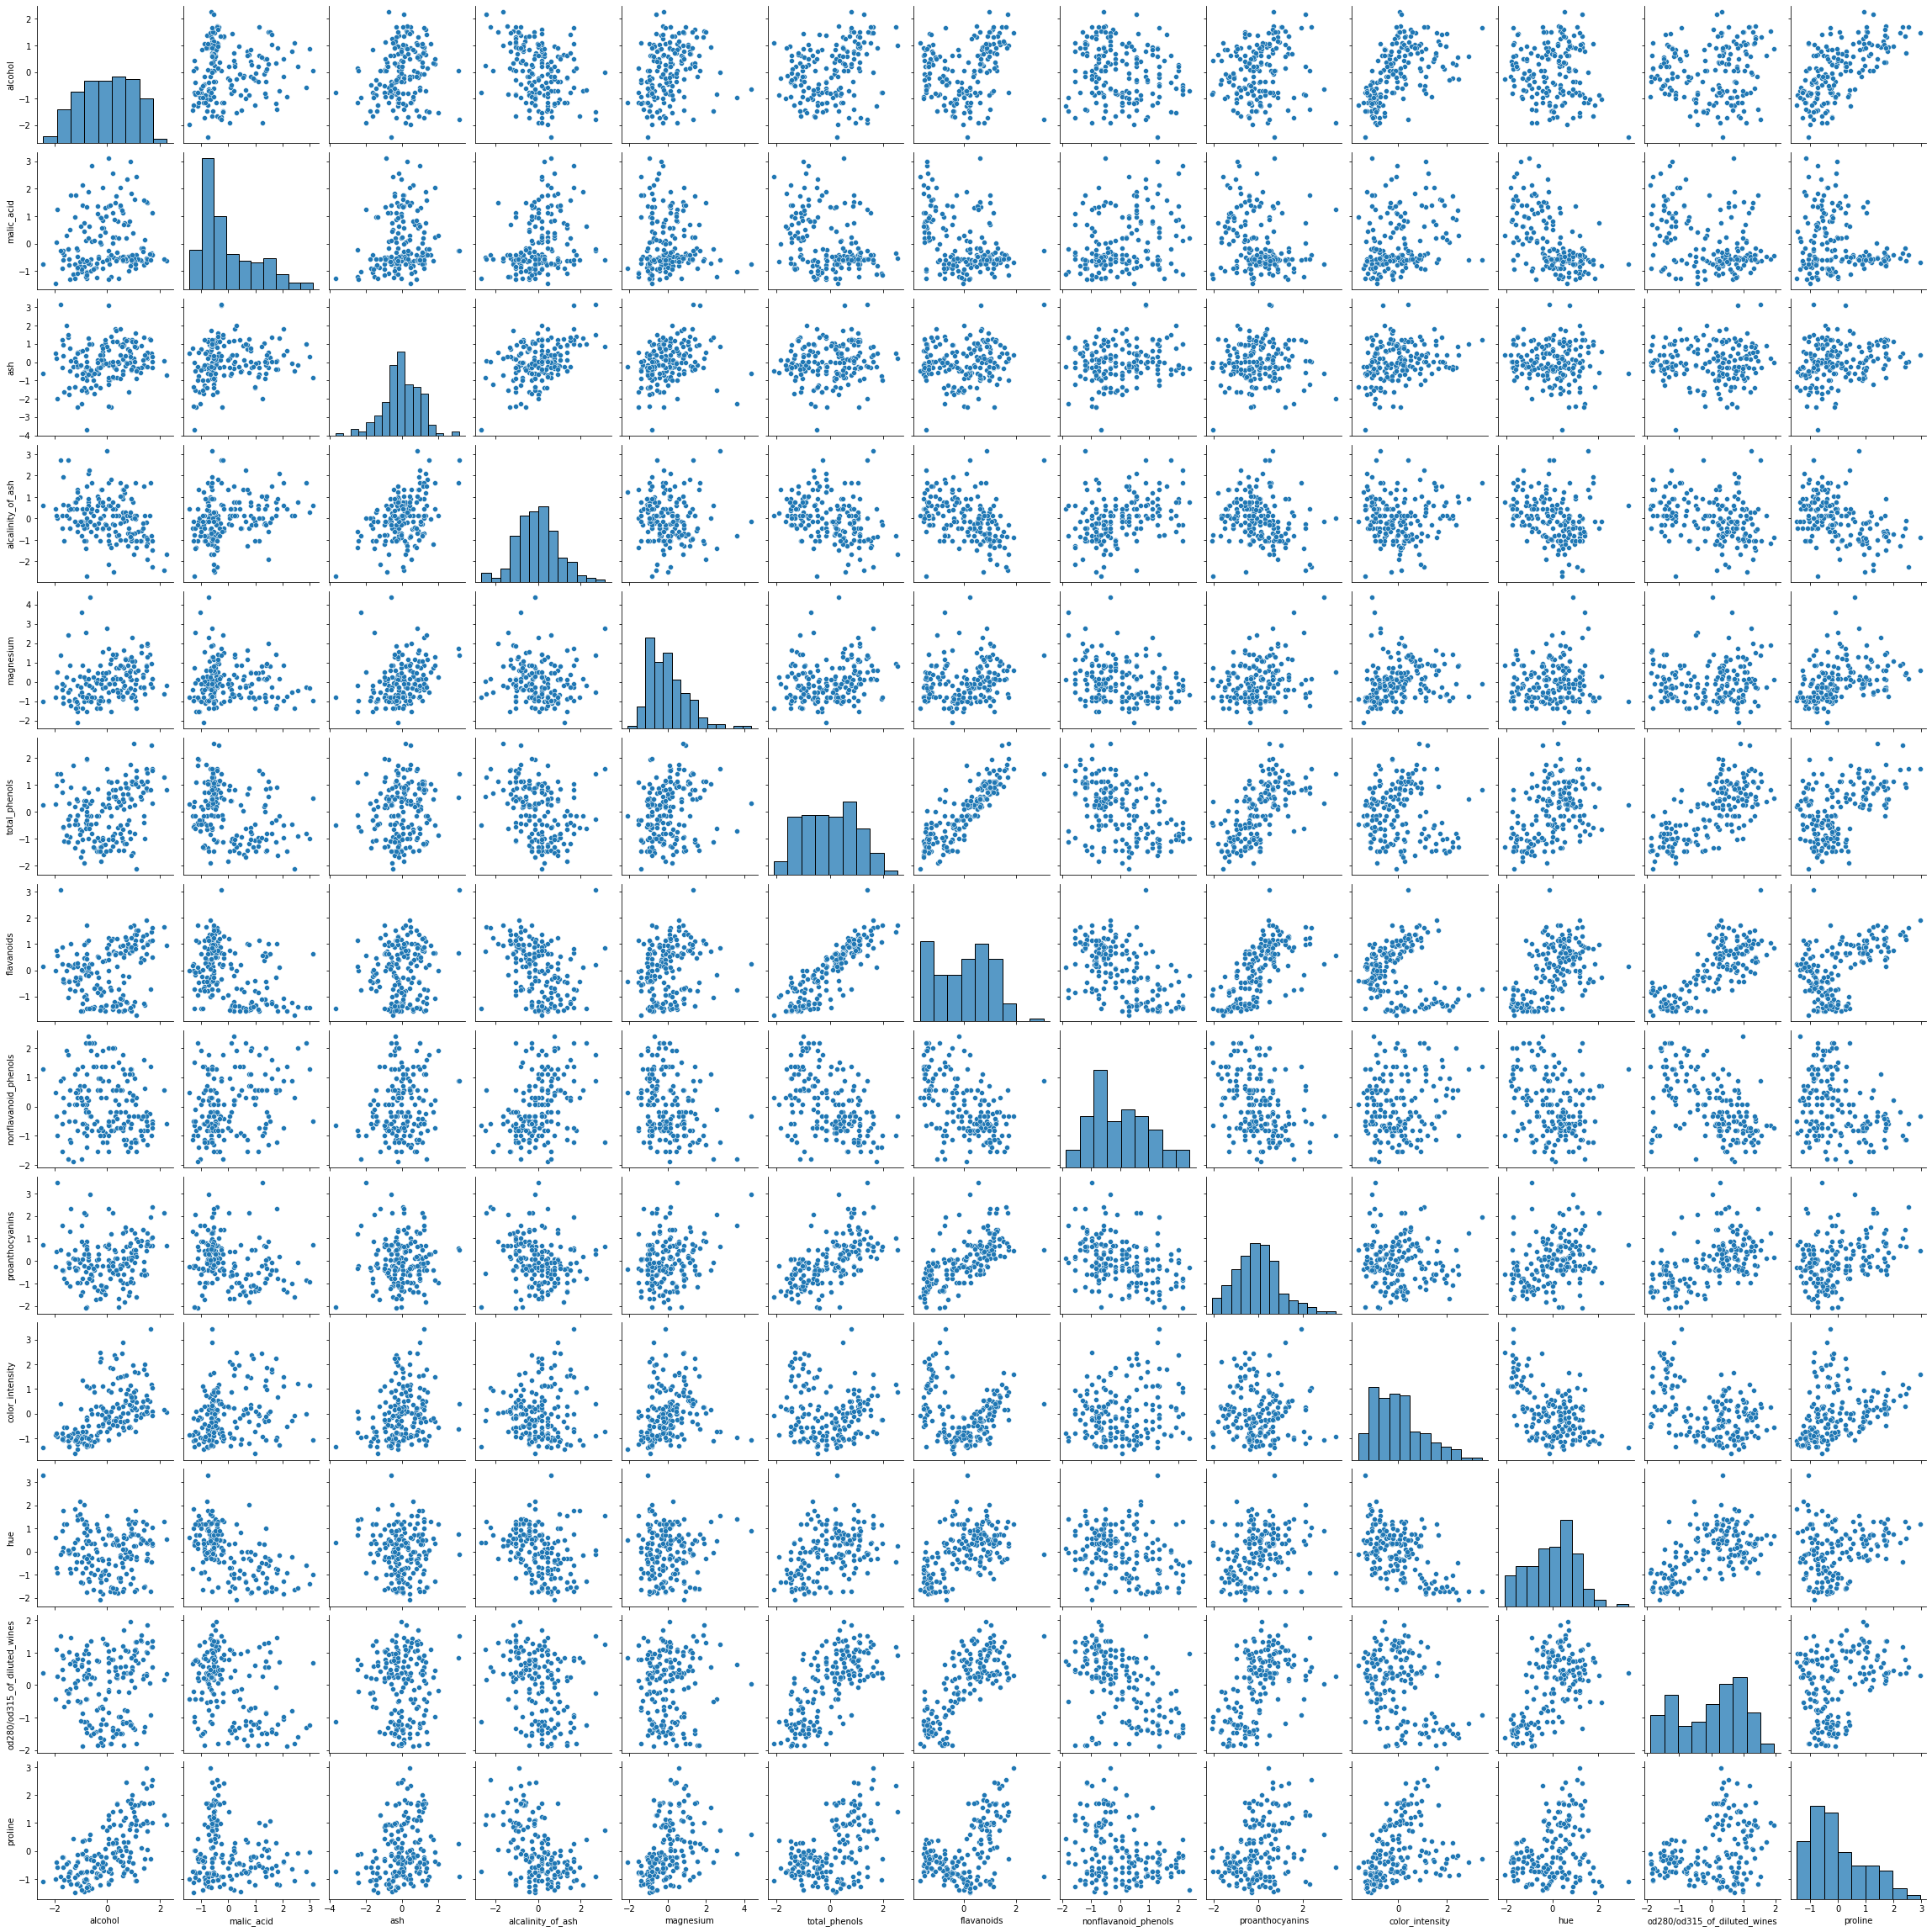

In [17]:
sns.pairplot(x)

## Creando el modelo

In [18]:
def kmeanModel(k: int):
    model = KMeans(n_clusters=k, max_iter=1000)
    model.fit(x)
    y_labels = model.labels_
    centroids = model.cluster_centers_
    return model.predict(x), centroids


In [19]:
# Elbow method

distortions = []
K = range(1,10)

for k in K:
    model = KMeans(n_clusters=k, max_iter=1000)
    model.fit(x)
    distortions.append(model.inertia_)

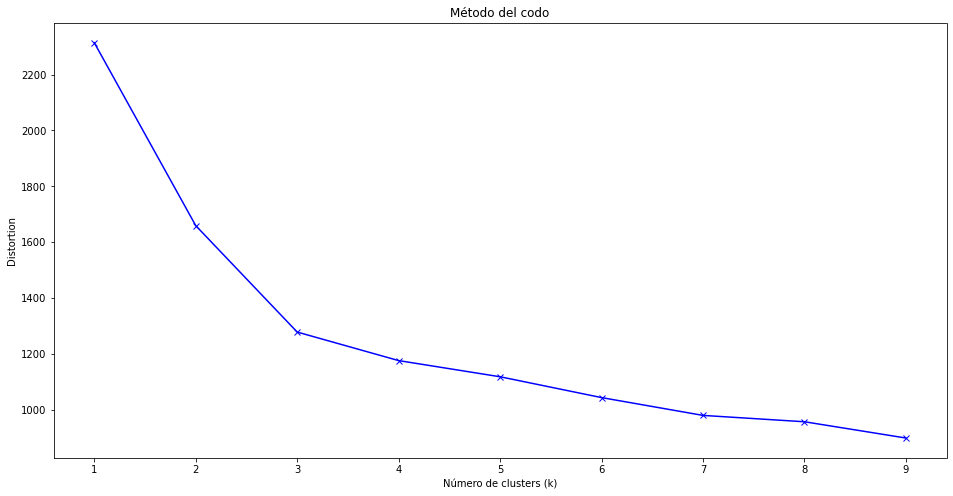

In [20]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Distortion')
plt.title('Método del codo')
plt.show()

Del método del codo podemos observar que el valor óptimo para el número de clusters es 3. Repetimos el modelo con ```n_clusters=3 ```

In [22]:
from sklearn import metrics

y_kmeans = kmeanModel(k=3)
accuracy = metrics.adjusted_rand_score(Y_wine, y_kmeans[0])
print('Accuracy:', accuracy)

Accuracy: 0.8974949815093207


Lo cual, nos da una precisión de 89 %. Lo cual es muy bueno ya que no queremos que nuestro modelo presente un sobreajuste.

## Graficación del modelo

In [25]:
y_kmeans_df = pd.DataFrame(y_kmeans[0], columns = ['Prediction'])
Z = pd.concat([x, y_kmeans_df], axis=1)

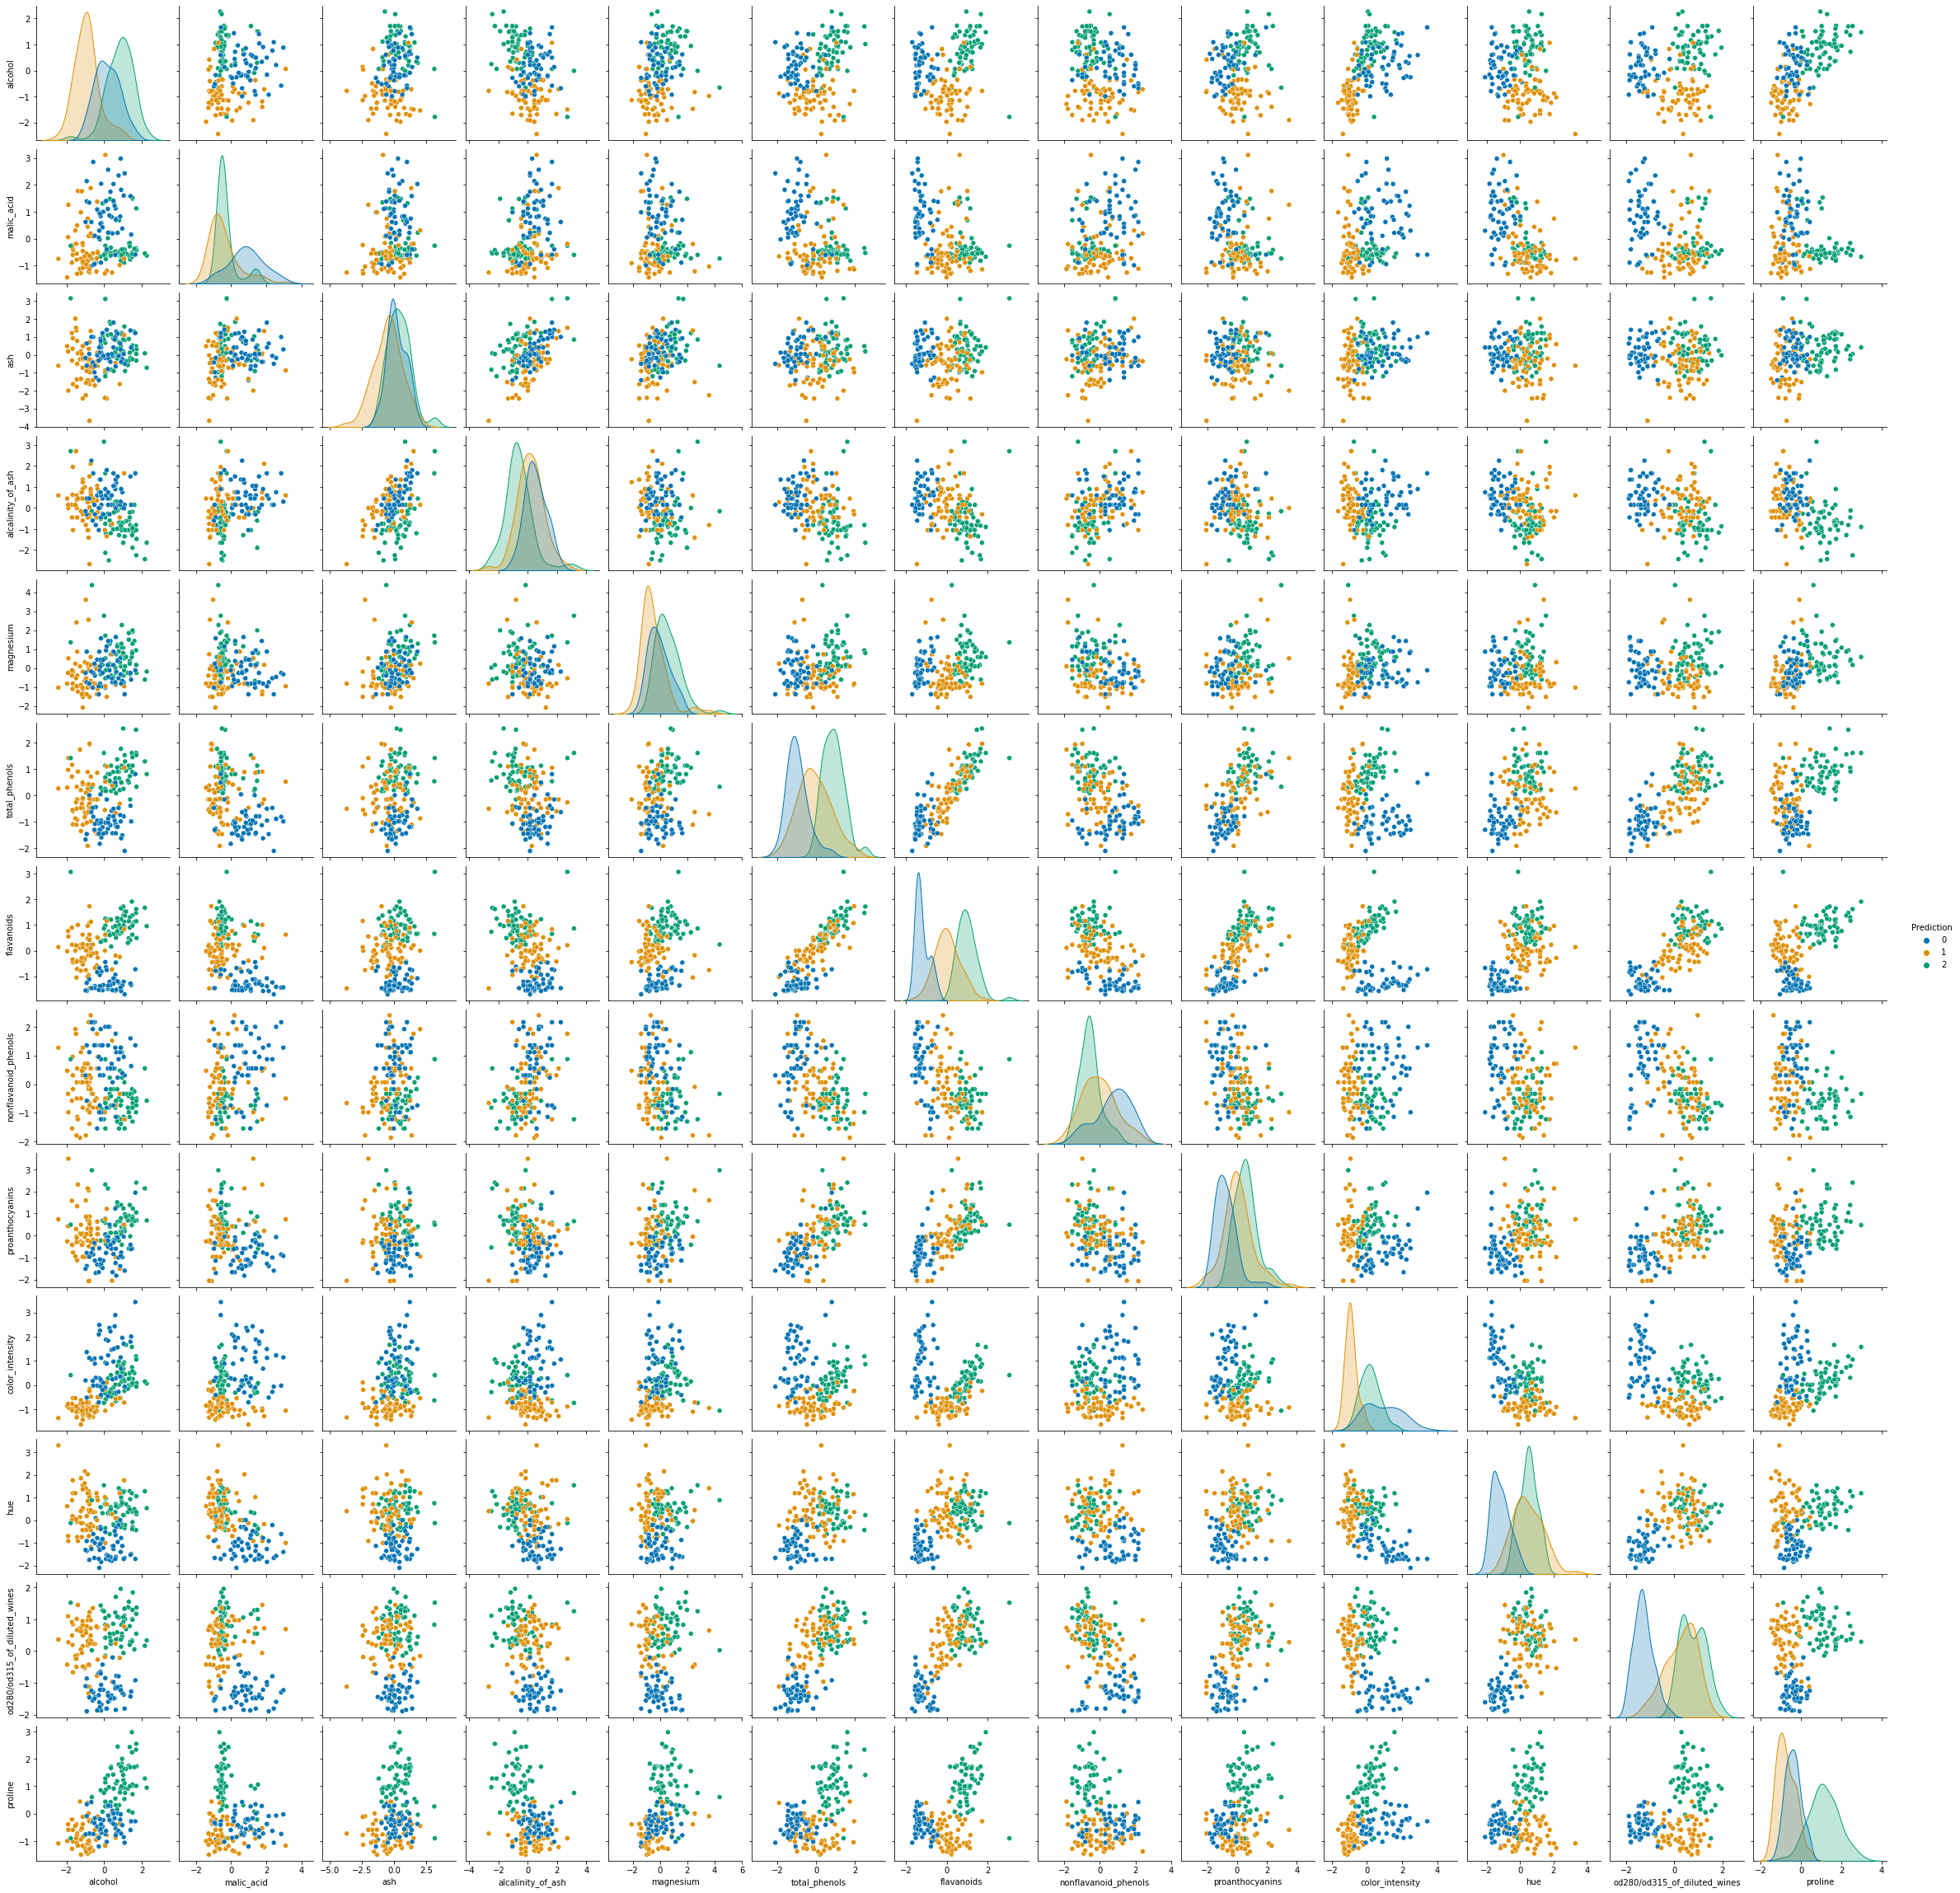

In [27]:
sns.pairplot(Z, hue = 'Prediction', palette='colorblind')